In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope

In [2]:
data = pd.read_csv("Stammdaten.csv", low_memory=False)

In [3]:
data.shape

(186756, 25)

In [4]:
data.columns

Index(['Materialnummer', 'Lieferant OB', 'Vertrag OB', 'Vertragsposition OB',
       'Planlieferzeit Vertrag', 'Vertrag Fix1', 'Vertrag_Fix2',
       'Beschaffungsart', 'Sonderbeschaffungsart', 'Disponent', 'Einkäufer',
       'DispoGruppe', 'Dispolosgröße', 'Gesamtbestand', 'Gesamtwert',
       'Preiseinheit', 'Kalender', 'Werk OB', 'Werk Infosatz',
       'Infosatznummer', 'Infosatztyp', 'WE-Bearbeitungszeit',
       'Planlieferzeit Mat-Stamm', 'Warengruppe', 'Basiseinheit'],
      dtype='object')

In [5]:
data.head(10)

,Materialnummer,Lieferant OB,Vertrag OB,Vertragsposition OB,Planlieferzeit Vertrag,Vertrag Fix1,Vertrag_Fix2,Beschaffungsart,Sonderbeschaffungsart,Disponent,...,Preiseinheit,Kalender,Werk OB,Werk Infosatz,Infosatznummer,Infosatztyp,WE-Bearbeitungszeit,Planlieferzeit Mat-Stamm,Warengruppe,Basiseinheit
0,00345241,3000,NaN,0,0,0,0,F,40.0,215,...,1,NaN,2100,NaN,NaN,NaN,1,3,80100000,ST
1,00346718,2000,NaN,0,0,0,0,F,40.0,215,...,1,E11,2100,NaN,NaN,NaN,1,3,80600000,ST
2,60038465,2000,NaN,0,0,0,0,F,40.0,215,...,1,NaN,3000,NaN,NaN,NaN,1,84,80100000,ST
3,60038640,2000,NaN,0,0,0,0,F,40.0,217,...,1,NaN,3000,NaN,NaN,NaN,1,84,80300000,ST
4,60014570,2000,NaN,0,0,0,0,F,40.0,215,...,1,E11,2100,NaN,NaN,NaN,1,3,80100000,ST
5,28287702UB,3000,NaN,0,0,0,0,F,42.0,233,...,1,E15,2100,2000.0,5.300529e+09,0.0,1,3,60100000,ST
6,28287702UB,3000,NaN,0,0,0,0,F,42.0,233,...,1,E15,2100,2100.0,5.300529e+09,0.0,1,3,60100000,ST
7,60045005,3000,NaN,0,0,0,0,F,42.0,233,...,1,NaN,2000,2000.0,5.300530e+09,0.0,1,1,110400000,ST
8,60045005,3000,NaN,0,0,0,0,F,42.0,233,...,1,NaN,2000,2100.0,5.300530e+09,0.0,1,1,110400000,ST
9,60045005,3000,NaN,0,0,0,0,F,42.0,233,...,1,NaN,2000,2800.0,5.300530e+09,0.0,1,1,110400000,ST


In [6]:
print(data.dtypes)

Materialnummer               object
Lieferant OB                  int64
Vertrag OB                  float64
Vertragsposition OB           int64
Planlieferzeit Vertrag        int64
Vertrag Fix1                  int64
Vertrag_Fix2                  int64
Beschaffungsart              object
Sonderbeschaffungsart       float64
Disponent                     int64
Einkäufer                   float64
DispoGruppe                  object
Dispolosgröße                object
Gesamtbestand                 int64
Gesamtwert                    int64
Preiseinheit                  int64
Kalender                     object
Werk OB                       int64
Werk Infosatz               float64
Infosatznummer              float64
Infosatztyp                 float64
WE-Bearbeitungszeit           int64
Planlieferzeit Mat-Stamm      int64
Warengruppe                  object
Basiseinheit                 object
dtype: object


In [7]:
data = data.dropna(axis=1) # drop any missing values

In [8]:
processed_data = data.select_dtypes(include=[np.number]) # include only numeric data

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data) 

In [10]:
data.shape

(186756, 18)

In [12]:
data.head(10)

,Materialnummer,Lieferant OB,Vertragsposition OB,Planlieferzeit Vertrag,Vertrag Fix1,Vertrag_Fix2,Beschaffungsart,Disponent,Einkäufer,Dispolosgröße,Gesamtbestand,Gesamtwert,Preiseinheit,Werk OB,WE-Bearbeitungszeit,Planlieferzeit Mat-Stamm,Warengruppe,Basiseinheit
0,00345241,3000,0,0,0,0,F,215,215.0,Z1,0,0,1,2100,1,3,80100000,ST
1,00346718,2000,0,0,0,0,F,215,215.0,Y4,0,0,1,2100,1,3,80600000,ST
2,60038465,2000,0,0,0,0,F,215,215.0,Z1,0,0,1,3000,1,84,80100000,ST
3,60038640,2000,0,0,0,0,F,217,217.0,Z1,0,0,1,3000,1,84,80300000,ST
4,60014570,2000,0,0,0,0,F,215,215.0,Y4,0,0,1,2100,1,3,80100000,ST
5,28287702UB,3000,0,0,0,0,F,233,233.0,Y4,0,0,1,2100,1,3,60100000,ST
6,28287702UB,3000,0,0,0,0,F,233,233.0,Y4,0,0,1,2100,1,3,60100000,ST
7,60045005,3000,0,0,0,0,F,233,233.0,Z7,0,0,1,2000,1,1,110400000,ST
8,60045005,3000,0,0,0,0,F,233,233.0,Z7,0,0,1,2000,1,1,110400000,ST
9,60045005,3000,0,0,0,0,F,233,233.0,Z7,0,0,1,2000,1,1,110400000,ST


In [14]:
# change to only include numeric data
numeric_data = data.select_dtypes(include=['int', 'float'])
numeric_data.fillna(numeric_data.mean(), inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Fit PCA to the scaled data
pca = PCA(n_components = 10)
pca.fit(scaled_data)

# Reconstruct the data
reconstructed_data = pca.inverse_transform(pca.transform(scaled_data))

# Calculate reconstruction errors
reconstruction_errors = np.sqrt(np.mean(np.square(scaled_data - reconstructed_data), axis=1))

# threshold for anomaly detection
threshold = 3  # can be adjusted

# Identify anomalies
anomalies = data[reconstruction_errors > threshold]

# Print or further analyze the anomalies
print("Detected anomalies:")
print(anomalies)


Detected anomalies:
       Materialnummer  Lieferant OB  Vertragsposition OB  \
180049     35190250UB        704926                  130   
180053     28210500UB        704926                  100   
180066     35190250UB        704926                  130   
180082     35195100UB        704926                  110   
180083     35195100UB        704926                  110   
180092     35194430UB        704926                  100   
180093     28210500UB        704926                  100   
180102     35190250UB        704926                  130   
180108     35194430UB        704926                  100   
180109     35195150UB        704926                  120   
180116     35190250UB        704926                  130   
180119     35195150UB        704926                  120   
180884       28053102        700151                  100   
180887       60086215        715408                  100   
180888       60087905        715408                  110   
180889       6008790

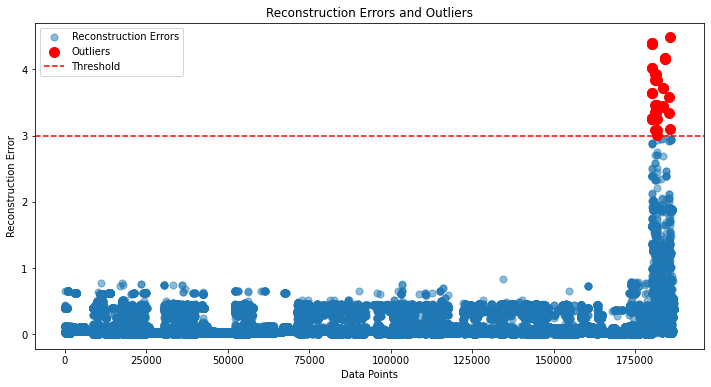

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the original data points
plt.scatter(range(len(reconstruction_errors)), reconstruction_errors, alpha=0.5, label='Reconstruction Errors', s=50)

# Highlight outliers
plt.scatter(anomalies.index, reconstruction_errors[reconstruction_errors > threshold], color='red', label='Outliers', s=100)

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Errors and Outliers')
plt.xlabel('Data Points')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()

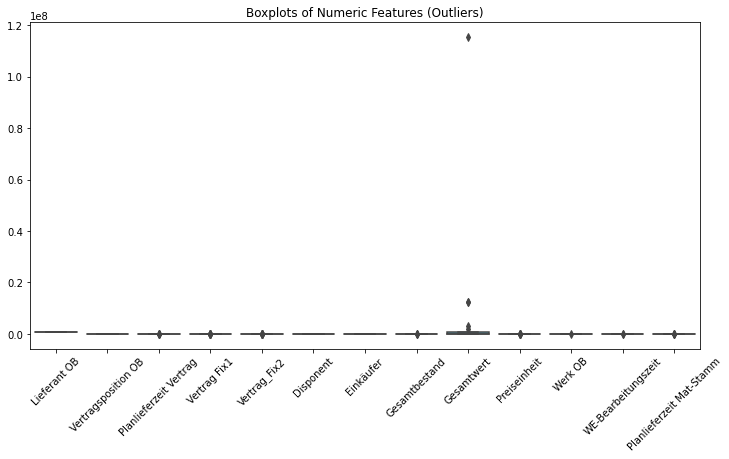

In [18]:
import seaborn as sns

# Create a DataFrame containing only the outliers
outliers_data = data.loc[reconstruction_errors > threshold]

# Plot boxplots for each numeric feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=outliers_data)
plt.title('Boxplots of Numeric Features (Outliers)')
plt.xticks(rotation=45)
plt.show()
